## Determine longest trajectories

In [2]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

import pickle

In [24]:
# Get the traj lengths
d_lengths = {}
for i in tqdm_notebook(range(1000)):
    for j in range(5):
        path = f"/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run{j}-clone{i}.xtc"
        if os.path.exists(path):
            try: # note i'm using mdanalysis here because its faster than loading into mdtraj
                u = mda.Universe("/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run0-clone0.pdb", f"/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run{j}-clone{i}.xtc")
                n_frames = u.trajectory.n_frames
                if j not in d_lengths:
                    d_lengths[j] = {}
                d_lengths[j][i] = n_frames
            except:
                continue



  0%|          | 0/1000 [00:00<?, ?it/s]

Exception ignored in: <function ReaderBase.__del__ at 0x2b16b52a68b0>
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py", line 2152, in __del__
    self.close()
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py", line 179, in close
    self._xdr.close()
AttributeError: 'XTCReader' object has no attribute '_xdr'
Exception ignored in: <function ReaderBase.__del__ at 0x2b16b52a68b0>
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py", line 2152, in __del__
    self.close()
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py", line 179, in close
    self._xdr.close()
AttributeError: 'XTCReader' object has no attribute '_xdr'
Exception ignored in: <function ReaderBase.__del__ at 0x2b

In [27]:
with open("050621_lengths.pickle", "wb") as f:
    pickle.dump(d_lengths, f)

In [28]:
with open("050621_lengths.pickle", "rb") as f:
    d_lengths = pickle.load(f)

In [32]:
lengths = [length for run, clone_dict in d_lengths.items() for clone, length in clone_dict.items()]

<AxesSubplot:ylabel='Density'>

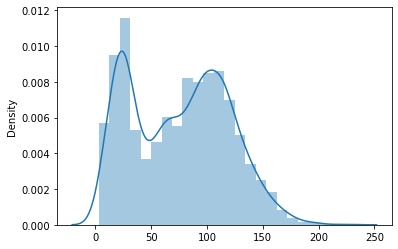

In [33]:
sns.distplot(lengths)

In [35]:
long_trajs = [(run, clone) for run, clone_dict in d_lengths.items() for clone, length in clone_dict.items() if length > 150]

In [36]:
len(long_trajs)

162

In [37]:
long_trajs

[(0, 0),
 (0, 1),
 (0, 4),
 (0, 6),
 (0, 17),
 (0, 46),
 (0, 92),
 (0, 109),
 (0, 123),
 (0, 157),
 (0, 195),
 (0, 242),
 (0, 286),
 (0, 299),
 (0, 342),
 (0, 375),
 (0, 382),
 (0, 385),
 (0, 418),
 (0, 423),
 (0, 424),
 (0, 428),
 (0, 460),
 (0, 461),
 (0, 472),
 (0, 506),
 (0, 543),
 (0, 571),
 (0, 742),
 (0, 765),
 (0, 857),
 (0, 885),
 (0, 904),
 (1, 1),
 (1, 7),
 (1, 9),
 (1, 14),
 (1, 21),
 (1, 63),
 (1, 76),
 (1, 129),
 (1, 136),
 (1, 148),
 (1, 193),
 (1, 237),
 (1, 240),
 (1, 287),
 (1, 295),
 (1, 321),
 (1, 343),
 (1, 345),
 (1, 361),
 (1, 363),
 (1, 381),
 (1, 407),
 (1, 425),
 (1, 426),
 (1, 475),
 (1, 528),
 (1, 530),
 (1, 561),
 (1, 564),
 (1, 567),
 (1, 661),
 (1, 679),
 (1, 702),
 (1, 792),
 (1, 819),
 (2, 0),
 (2, 2),
 (2, 12),
 (2, 30),
 (2, 56),
 (2, 89),
 (2, 141),
 (2, 153),
 (2, 215),
 (2, 230),
 (2, 257),
 (2, 285),
 (2, 340),
 (2, 347),
 (2, 355),
 (2, 365),
 (2, 428),
 (2, 435),
 (2, 509),
 (2, 531),
 (2, 550),
 (2, 574),
 (2, 592),
 (2, 609),
 (2, 610),
 (2, 7

## Compute dihedral angles for Y501

In [3]:
import mdtraj as md
import os
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

import time
from simtk.openmm import unit
import itertools
import numpy as np

### Test angle computation on run 0 clone 428

In [38]:
top = md.load("/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run0-clone0.pdb")
path = "/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run0-clone428.xtc"
traj = md.load(path, top=top)


In [49]:
tyrosine_atoms = list(range(2605, 2626))

In [89]:
phi_indices, phi_angles = md.compute_phi(traj)

In [90]:
for i, phi_index_list in enumerate(phi_indices):
    found = False
    for atom in tyrosine_atoms:
        if atom in phi_index_list and not found:
            print(i, phi_index_list)
            found = True

168 [2603 2605 2607 2624]
169 [2624 2626 2628 2631]


In [92]:
psi_indices, psi_angles = md.compute_psi(traj)

In [93]:
for i, psi_index_list in enumerate(psi_indices):
    found = False
    for atom in tyrosine_atoms:
        if atom in psi_index_list and not found:
            print(i, psi_index_list)
            found = True

167 [2591 2593 2603 2605]
168 [2605 2607 2624 2626]


In [75]:
chi1_indices, chi1_angles = md.compute_chi1(traj)

In [57]:
for i, chi1_index_list in enumerate(chi1_indices):
    found = False
    for atom in tyrosine_atoms:
        if atom in chi1_index_list and not found:
            print(i, chi1_index_list)
            found = True

146 [2605 2607 2609 2612]


In [42]:
chi2_indices, chi2_angles = md.compute_chi2(traj)

In [58]:
for i, chi2_index_list in enumerate(chi2_indices):
    found = False
    for atom in tyrosine_atoms:
        if atom in chi2_index_list and not found:
            print(i, chi2_index_list)
            found = True

104 [2607 2609 2612 2613]


In [46]:
for atom in traj.topology.atoms:
    if atom.residue.name == 'TYR' and atom.residue.index == 169:
        print(atom.index, atom.residue.index, atom.residue.chain.index, atom)

2605 169 0 TYR501-N
2606 169 0 TYR501-H
2607 169 0 TYR501-CA
2608 169 0 TYR501-HA
2609 169 0 TYR501-CB
2610 169 0 TYR501-HB2
2611 169 0 TYR501-HB3
2612 169 0 TYR501-CG
2613 169 0 TYR501-CD1
2614 169 0 TYR501-HD1
2615 169 0 TYR501-CE1
2616 169 0 TYR501-HE1
2617 169 0 TYR501-CZ
2618 169 0 TYR501-OH
2619 169 0 TYR501-HH
2620 169 0 TYR501-CE2
2621 169 0 TYR501-HE2
2622 169 0 TYR501-CD2
2623 169 0 TYR501-HD2
2624 169 0 TYR501-C
2625 169 0 TYR501-O


### Compute angles for longest trajs

In [79]:
chi1_long = []
chi2_long = []
for key in tqdm_notebook(long_trajs):
    j, i = key
    path = f"/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run{j}-clone{i}.xtc"
    traj = md.load(path, top=top)
    chi1_indices, chi1_angles = md.compute_chi1(traj)
    assert np.array_equal(chi1_indices[146], np.array([2605, 2607, 2609, 2612]))
    chi1_long.append(chi1_angles[:, 146])
    assert np.array_equal(chi2_indices[104], np.array([2607, 2609, 2612, 2613]))
    chi2_indices, chi2_angles = md.compute_chi2(traj)
    chi2_long.append(chi2_angles[:, 104])

  0%|          | 0/162 [00:00<?, ?it/s]

In [80]:
with open("050621_chi1.pickle", "wb") as f:
    pickle.dump(chi1_long, f)

In [81]:
with open("050621_chi2.pickle", "wb") as f:
    pickle.dump(chi2_long, f)

In [4]:
with open("050621_chi1.pickle", "rb") as f:
    chi1_long = pickle.load(f)

with open("050621_chi2.pickle", "rb") as f:
    chi2_long = pickle.load(f)

(-3.141592653589793, 3.141592653589793)

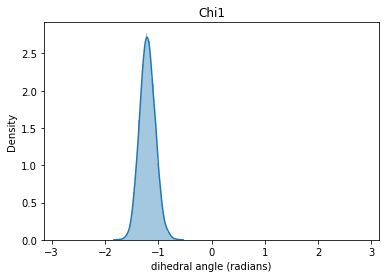

In [7]:
sns.distplot([element for array in chi1_long for element in array])
plt.xlabel("dihedral angle (radians)")
plt.title("Chi1")
plt.xlim([-np.pi, np.pi])

(-3.141592653589793, 3.141592653589793)

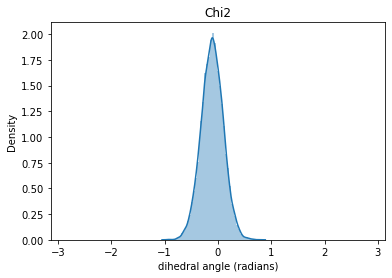

In [8]:
sns.distplot([element for array in chi2_long for element in array])
plt.xlabel("dihedral angle (radians)")
plt.title("Chi2")
plt.xlim([-np.pi, np.pi])

In [102]:
phi1_long = []
phi2_long = []
psi1_long = []
psi2_long = []
for key in tqdm_notebook(long_trajs):
    j, i = key
    path = f"/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run{j}-clone{i}.xtc"
    traj = md.load(path, top=top)
    phi_indices, phi_angles = md.compute_phi(traj)
    assert np.array_equal(phi_indices[168], np.array([2603, 2605, 2607, 2624]))
    phi1_long.append(phi_angles[:, 168])
    assert np.array_equal(phi_indices[169], np.array([2624, 2626, 2628, 2631]))
    phi2_long.append(phi_angles[:, 169])
    psi_indices, psi_angles = md.compute_psi(traj)
    assert np.array_equal(psi_indices[167], np.array([2591, 2593, 2603, 2605]))
    psi1_long.append(psi_angles[:, 167])
    assert np.array_equal(psi_indices[168], np.array([2605, 2607, 2624, 2626]))
    psi2_long.append(psi_angles[:, 168])


  0%|          | 0/162 [00:00<?, ?it/s]

In [103]:
with open("050621_phi1.pickle", "wb") as f:
    pickle.dump(phi1_long, f)
with open("050621_phi2.pickle", "wb") as f:
    pickle.dump(phi2_long, f)

In [104]:
with open("050621_psi1.pickle", "wb") as f:
    pickle.dump(psi1_long, f)
with open("050621_psi2.pickle", "wb") as f:
    pickle.dump(psi2_long, f)

In [10]:
with open("050621_phi1.pickle", "rb") as f:
    phi1_long = pickle.load(f)
with open("050621_phi2.pickle", "rb") as f:
    phi2_long = pickle.load(f)
with open("050621_psi1.pickle", "rb") as f:
    psi1_long = pickle.load(f)
with open("050621_psi2.pickle", "rb") as f:
    psi2_long = pickle.load(f)

(-3.141592653589793, 3.141592653589793)

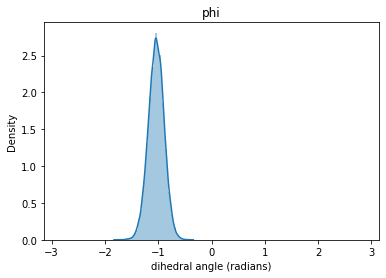

In [15]:
sns.distplot([element for array in phi1_long for element in array])
plt.xlabel("dihedral angle (radians)")
plt.title("phi")
plt.xlim([-np.pi, np.pi])

(-3.141592653589793, 3.141592653589793)

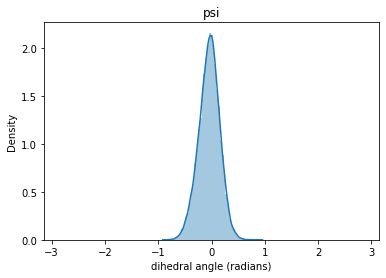

In [16]:
sns.distplot([element for array in psi1_long for element in array])
plt.xlabel("dihedral angle (radians)")
plt.title("psi")
plt.xlim([-np.pi, np.pi])

## Compute distances between residues

In [109]:
import mdtraj as md
import os
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

import time
from simtk.openmm import unit
import itertools
import numpy as np

### Test compute_contacts on run0 clone428

In [110]:
top = md.load("/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run0-clone0.pdb")
path = "/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run0-clone428.xtc"
traj = md.load(path, top=top)


In [111]:
# Get neighboring residues
resid = 501
radius = 1

for res in top.topology.residues:
    if res.resSeq == resid and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]
solute_atoms = list(traj.topology.select("is_protein"))
neighboring_atoms = list(md.compute_neighbors(traj, radius, query_indices, haystack_indices=solute_atoms)[0])
neighboring_residues = set([atom.residue.index for atom in top.topology.atoms if atom.index in neighboring_atoms])

In [112]:
# Get all pairs of residues
pairs = []
for pair in itertools.combinations(neighboring_residues, 2):
    pairs.append(pair)

In [113]:
len(pairs)

2016

In [114]:
initial_time = time.time()
distances = md.compute_contacts(traj, contacts=pairs, scheme='closest-heavy')
elapsed_time = (time.time() - initial_time) * unit.seconds
print(f'took: {elapsed_time / unit.seconds} seconds')

took: 2.642390489578247 seconds


### Run compute_contacts on trajectories with > 400 frames

In [116]:
distances_long = []
for key in tqdm_notebook(long_trajs):
    j, i = key
    path = f"/data/chodera/zhangi/vir/fah/PROJ17344/munged_data/run{j}-clone{i}.xtc"
    traj = md.load(path, top=top)
    distances = md.compute_contacts(traj, contacts=pairs, scheme='closest-heavy')
    distances_long.append(distances)

  0%|          | 0/162 [00:00<?, ?it/s]

In [117]:
with open("050621_distances_1.pickle", "wb") as f:
    pickle.dump(distances_long, f)

In [118]:
distances_final = np.array([output[0] for output in distances_long])

In [119]:
for res in top.topology.residues:
    if res.index in neighboring_residues:
        print(res.index, res)

69 VAL401
70 ILE402
71 ARG403
72 GLY404
73 ASP405
105 ASN437
106 SER438
107 ASN439
108 ASN440
110 ASP442
111 SER443
112 LYS444
113 VAL445
114 GLY446
115 GLY447
116 ASN448
117 TYR449
118 ASN450
119 TYR451
161 GLN493
162 SER494
163 TYR495
164 GLY496
165 PHE497
166 GLN498
167 PRO499
168 THR500
169 TYR501
170 GLY502
171 VAL503
172 GLY504
173 TYR505
174 GLN506
175 PRO507
176 TYR508
222 HIS34
223 GLU35
225 GLU37
226 ASP38
227 LEU39
228 PHE40
229 TYR41
230 GLN42
231 SER43
232 SER44
233 LEU45
234 ALA46
512 THR324
513 GLN325
514 GLY326
515 PHE327
517 GLU329
518 ASN330
537 TRP349
538 ASP350
539 LEU351
540 GLY352
541 LYS353
542 GLY354
543 ASP355
544 PHE356
545 ARG357
574 ALA386
581 ARG393


In [ ]:
# Question: should i discard the first X ns of data if im going to build an MSM?

In [ ]:
# See if using sidechain heavy atoms changes anything
distances = md.compute_contacts(traj, contacts=, scheme='sidechain-heavy')

In [ ]:
# See if using alpha carbons changes anything
distances = md.compute_contacts(traj, contacts=, scheme='ca')